<a href="https://colab.research.google.com/github/f629/3822356.github.io/blob/main/F0753_ch09_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F0753 範例程式 - 第 9 章 報表處理及視覺化：使用 pandas 及 seaborn

## 9-0 使用 pandas 匯入並分析資料

In [ ]:
from sklearn import datasets
datasets.load_iris().data

### *將資料集載入 DataFrame 物件*

In [ ]:
from sklearn import datasets
import pandas as pd

df = pd.DataFrame(datasets.load_iris().data)
print(df)

## 9-1 DataFrame 物件的行列選取及統計量數

### *重新命名行 (欄位) 名稱*

In [ ]:
from sklearn import datasets
import pandas as pd

col_names = ['Sepal width', 'Sepal length', 'Petal width', 'Petal length']

df = pd.DataFrame(datasets.load_iris().data, columns=col_names)
print(df)

     Sepal width  Sepal length  Petal width  Petal length
0            5.1           3.5          1.4           0.2
1            4.9           3.0          1.4           0.2
2            4.7           3.2          1.3           0.2
3            4.6           3.1          1.5           0.2
4            5.0           3.6          1.4           0.2
..           ...           ...          ...           ...
145          6.7           3.0          5.2           2.3
146          6.3           2.5          5.0           1.9
147          6.5           3.0          5.2           2.0
148          6.2           3.4          5.4           2.3
149          5.9           3.0          5.1           1.8

[150 rows x 4 columns]


### *計算資料集的統計量數*

In [ ]:
# 沿用上一小節的 df

print(df.describe())

       Sepal width  Sepal length  Petal width  Petal length
count   150.000000    150.000000   150.000000    150.000000
mean      5.843333      3.057333     3.758000      1.199333
std       0.828066      0.435866     1.765298      0.762238
min       4.300000      2.000000     1.000000      0.100000
25%       5.100000      2.800000     1.600000      0.300000
50%       5.800000      3.000000     4.350000      1.300000
75%       6.400000      3.300000     5.100000      1.800000
max       7.900000      4.400000     6.900000      2.500000


### *取出特定行的資料*

In [ ]:
# 沿用上一小節的 df

print(df['Sepal width'])

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal width, Length: 150, dtype: float64


In [ ]:
df_col = df['Sepal width']

print(df_col.describe())

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: Sepal width, dtype: float64


In [ ]:
print(df_col.count())
print(df_col.sum())
print(df_col.mean())
print(df_col.var())
print(df_col.std())
print(df_col.min())
print(df_col.quantile(0.25))
print(df_col.median())
print(df_col.quantile(0.75))
print(df_col.max())

150
876.5
5.843333333333334
0.6856935123042507
0.828066127977863
4.3
5.1
5.8
6.4
7.9


### *取出特定列的資料*

In [ ]:
# 沿用上一小節的 df

print(df.loc[0])

Sepal width     5.1
Sepal length    3.5
Petal width     1.4
Petal length    0.2
Name: 0, dtype: float64


### *把行或列轉為 ndarray*

In [ ]:
# 沿用上一小節的 df

print(df['Sepal width'].to_numpy())
print(df.loc[0].to_numpy())

[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9]
[5.1 3.5 1.4 0.2]


## 9-2 以 seaborn 將報表資料視覺化

### *pair plot：一張圖畫出所有欄位的關係*

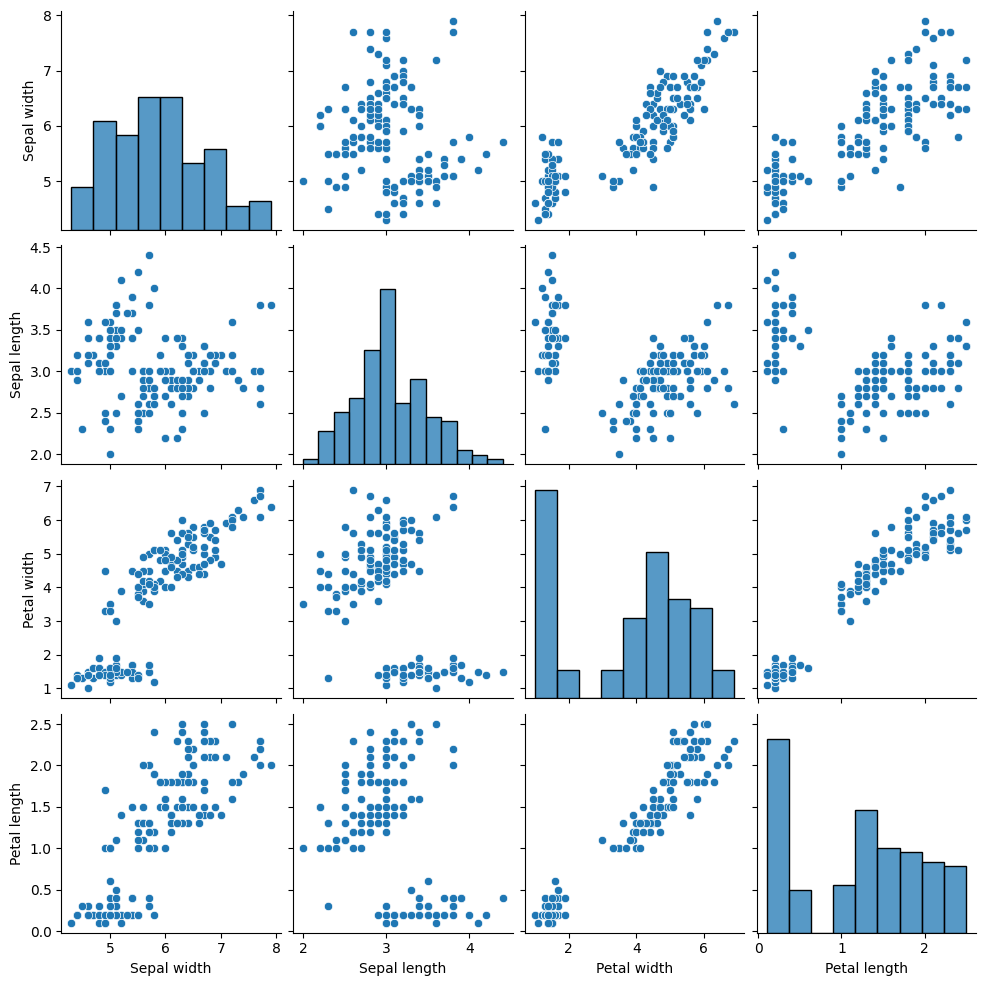

In [ ]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['Sepal width', 'Sepal length', 'Petal width', 'Petal length']
df = pd.DataFrame(datasets.load_iris().data, columns=column_names)

sns.pairplot(df)
plt.show()

### *在 pair plot 只顯示特定欄位*

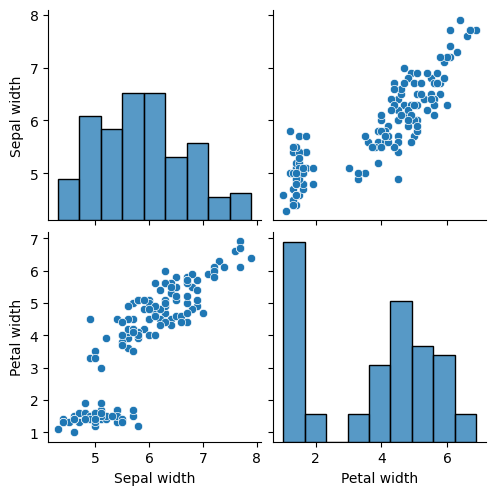

In [ ]:
# 沿用上一小節的 df

df_cols = df[['Sepal width', 'Petal width']]
sns.pairplot(df_cols)
plt.show()

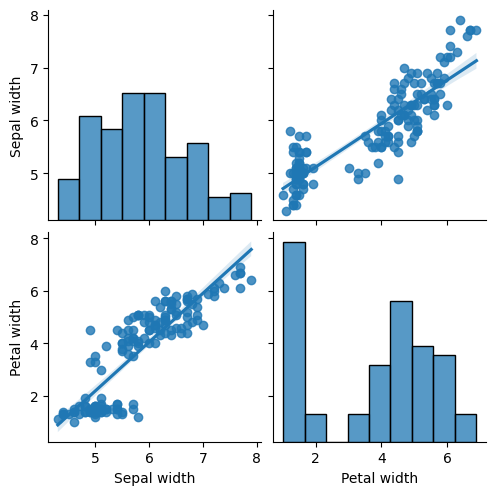

In [ ]:
df_cols = df[['Sepal width', 'Petal width']]
sns.pairplot(df_cols, kind='reg')
plt.show()

### *調整 pair plot 大小及字體的方法*

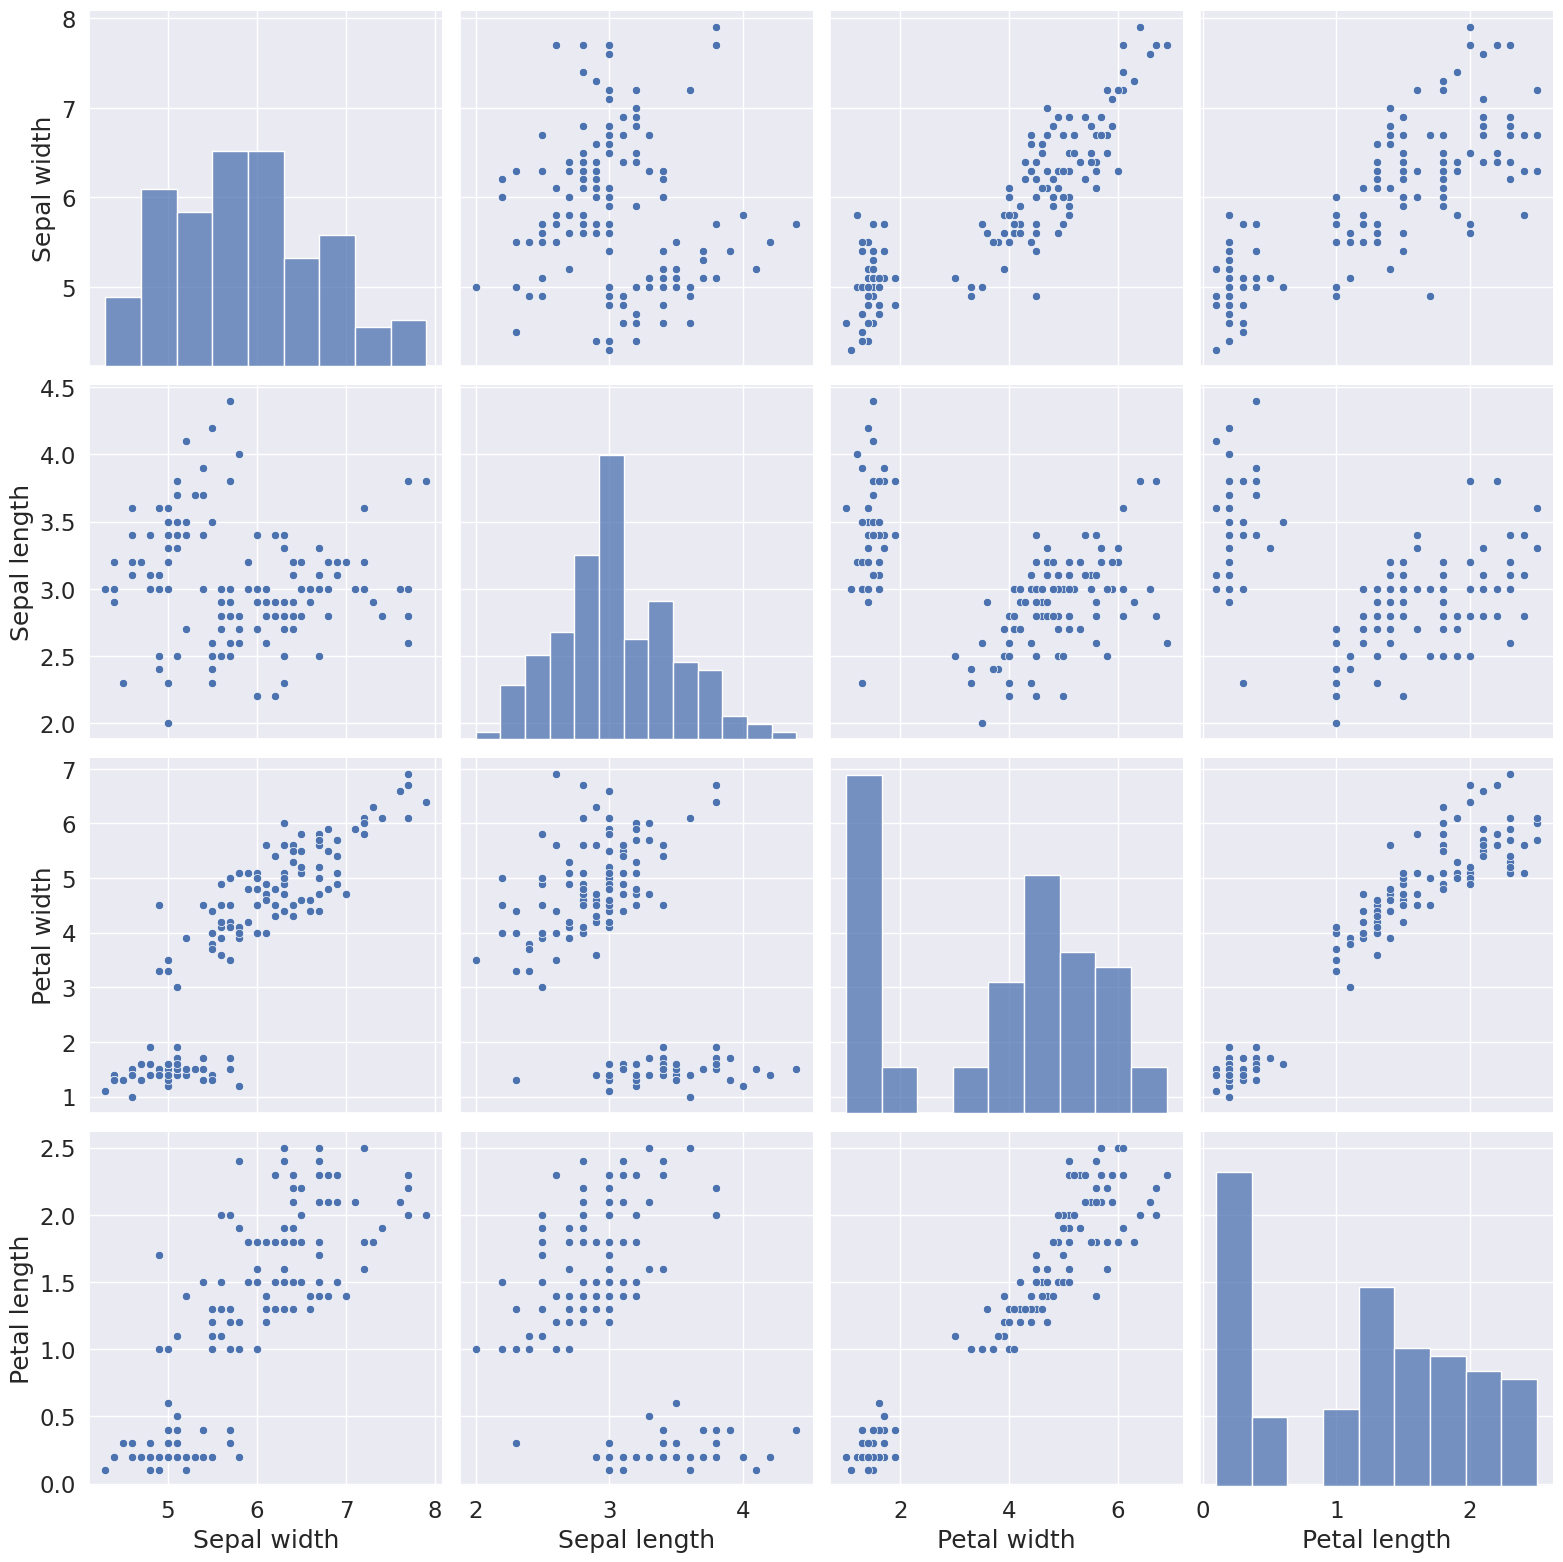

In [ ]:
# 沿用上一小節的 df

sns.set(font_scale=1.5)
sns.pairplot(df, height=4)
plt.show()

### *印出相關係數矩陣*

In [ ]:
# 沿用上一小節的 df

print(df.corr())

              Sepal width  Sepal length  Petal width  Petal length
Sepal width      1.000000     -0.117570     0.871754      0.817941
Sepal length    -0.117570      1.000000    -0.428440     -0.366126
Petal width      0.871754     -0.428440     1.000000      0.962865
Petal length     0.817941     -0.366126     0.962865      1.000000


### *用熱圖 (heat map) 做視覺化*

In [ ]:
# 沿用上一小節的 df

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [ ]:
cols = ['Sepal width', 'Sepal length']
sns.heatmap(df[cols].corr(), annot=True , vmin=-1, vmax=1)
plt.show()

### *調整熱圖大小*

In [ ]:
# 沿用上一小節的 df

sns.set(font_scale=1.5)
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

### *箱型圖*

In [ ]:
# 沿用上一小節的 df

sns.boxplot(data=df)
plt.show()

### *(bonus) 調整箱型圖大小*

In [ ]:
# 沿用上一小節的 df

sns.set(font_scale=1.5)
plt.figure(figsize=(12, 12))
sns.boxplot(data=df)
plt.show()

## 9-3 讀取空汙資訊的 CSV 格式報表

請至以下位置下載 CSV：

* https://scidm.nchc.org.tw/dataset/4ba06157-3854-4111-9383-3b8a188c962a (點選 AQI.csv 旁 "探索" -> "下載")
* https://data.gov.tw/dataset/40448 (點選 "CSV")

In [ ]:
import pandas as pd

df = pd.read_csv ( r' C:\Users\f629f\Downloads\aqx_p_432.csv' )
df

### *在載入報表時就篩選欄位*

In [ ]:
df = pd.read_csv(r'C:\Users\使用者名稱\Downloads\aqi.csv', usecols=['AQI', 'CO', 'O3', 'PM10', 'PM2.5', 'NO2', 'NO'])
df

### *將某欄位指定為索引*

In [ ]:
df = pd.read_csv(r'C:\Users\使用者名稱\Downloads\aqi.csv',
                 usecols=['SiteName', 'AQI', 'CO', 'O3', 'PM10', 'PM2.5', 'NO2', 'NO'], index_col='SiteName')
df

### *整理非數值的資料*

In [ ]:
# 沿用上一小節的 df

df = df.apply(pd.to_numeric, errors='coerce')

### *從整理好的資料產生統計結果與圖表*

In [ ]:
# 沿用上一小節的 df

df.describe()

In [ ]:
sns.set(font_scale=1.0)   # 如果執行過前面的圖表範例, 此行會重設字體比例

sns.heatmap(df.corr(), annot=True)
plt.show()